In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import re

In [3]:
df = pd.read_csv("twitter.csv")

In [4]:
def clean_text(text):
    # @mention ve URL temizliği
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    # Özel karakter temizliği
    text = re.sub(r'[^a-zA-Z0-9\s#]', '', text)
    text = text.lower()  # Küçük harfe çevirme
    return text

In [5]:
df['cleaned_text'] = df['tweet'].apply(clean_text)

In [6]:
df['polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [7]:
df['sentiment_label'] = df['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [8]:
print(df['sentiment_label'].value_counts())

sentiment_label
Positive    15846
Neutral     11381
Negative     4735
Name: count, dtype: int64


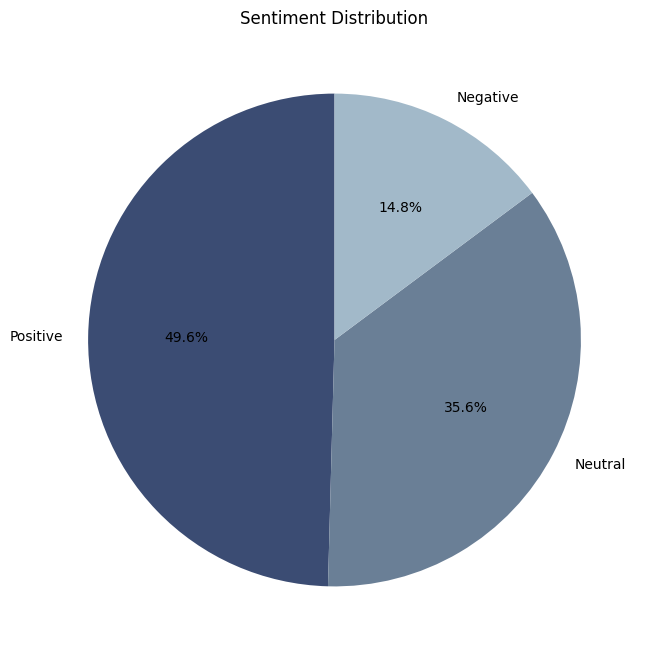

In [9]:
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', 
                      colors=['#3B4C73', '#6A7F96', '#A2B9C9'], 
                      startangle=90, legend=False)
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


In [10]:
def extract_hashtags(text):
    return re.findall(r'#\w+', text)


In [11]:
df['hashtags'] = df['tweet'].apply(extract_hashtags)

In [12]:
all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]
hashtag_freq = pd.Series(all_hashtags).value_counts().head(10)


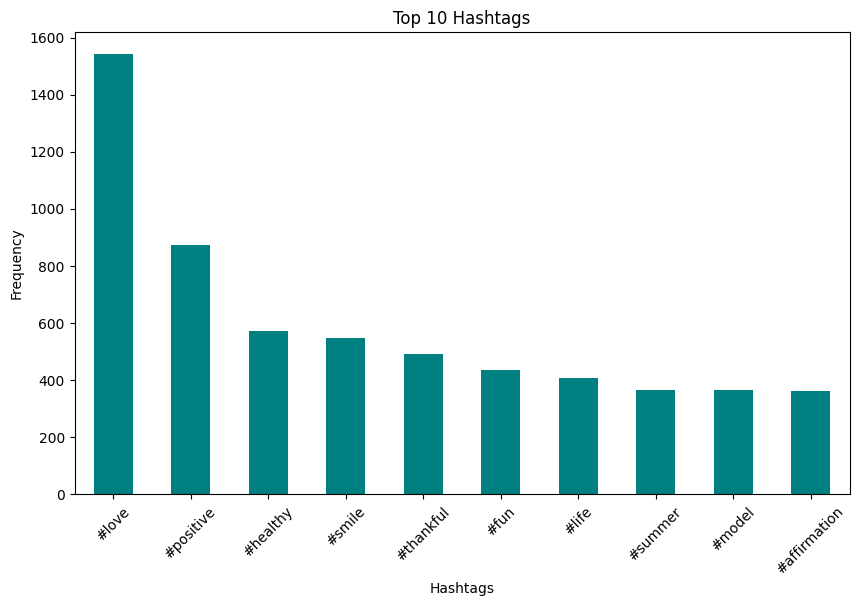

In [13]:
plt.figure(figsize=(10, 6))
hashtag_freq.plot(kind='bar', color='teal')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [14]:
all_words = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)


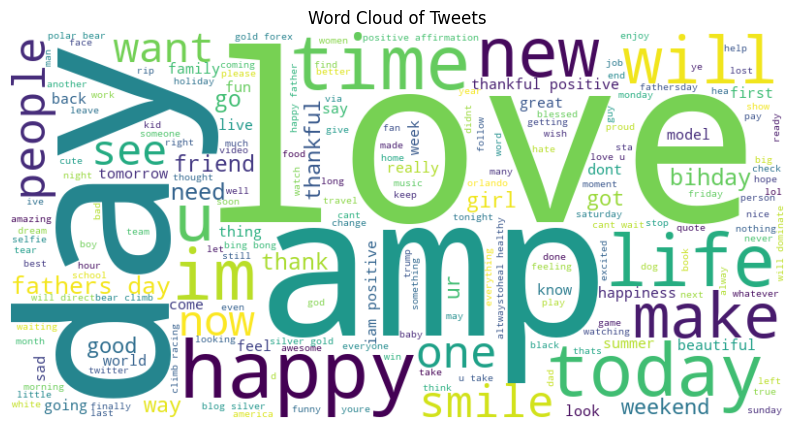

In [15]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

In [16]:
df['tweet_length'] = df['cleaned_text'].apply(len)


In [17]:
correlation_matrix = df[['polarity', 'tweet_length']].corr()

print(correlation_matrix)


              polarity  tweet_length
polarity      1.000000     -0.021502
tweet_length -0.021502      1.000000


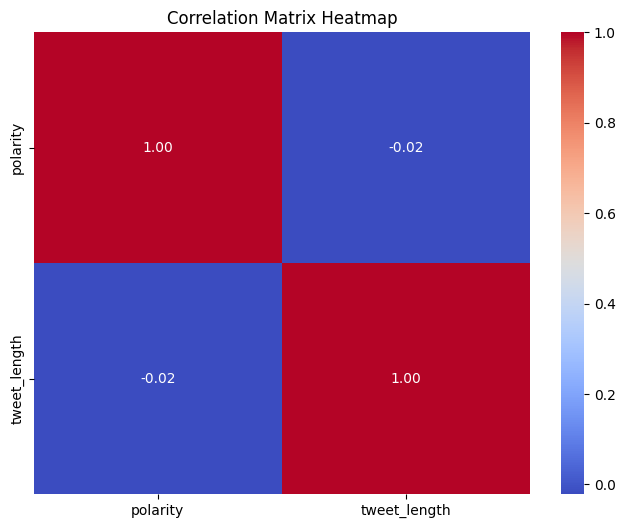

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [19]:
df['hashtag_count'] = df['hashtags'].apply(len)


In [20]:
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))


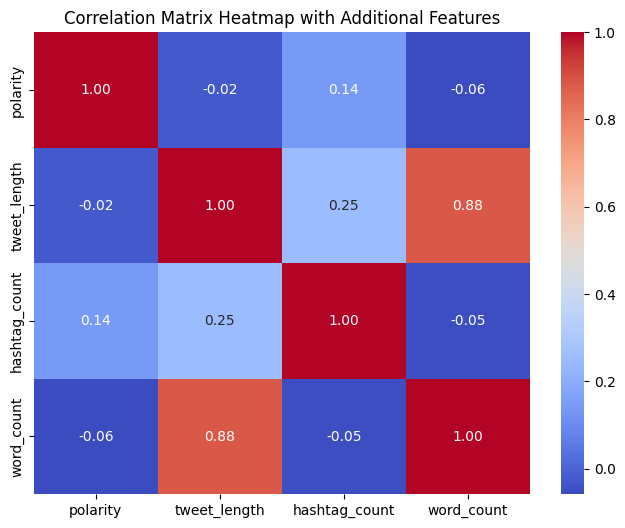

In [21]:
correlation_matrix = df[['polarity', 'tweet_length', 'hashtag_count', 'word_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap with Additional Features')
plt.show()
